# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. This Question involves the use of simple linear regression on Auto data set.

In [0]:
auto = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Auto.csv')

In [3]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [0]:
auto.horsepower.replace('?',np.nan,inplace=True)
auto.dropna(inplace=True)

In [0]:
auto.horsepower = auto.horsepower.astype(np.int64)

In [6]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

- Lets take the mpg as the response variable.
- Lets take the Horsepower as the predictor variable.

### (A) Perform a simple linear regression with mpg as the response and the horsepower as the predictor.Use the summary() function to print the results and state down your Observations.

In [0]:
import statsmodels.formula.api as smf

In [8]:
lm = smf.ols('mpg~horsepower',data=auto).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           7.03e-81
Time:                        09:33:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

**Observation**
- The horsepower predictor is significant.
- the R-square value is 0.606.
- Durbin-Watson is not close to 2, we might have collinearity issues.

#### ***i. Is there a relationship between the predictor and response?***

- Yes, the horsepower predictor is sigificant for the given linear model.
- The p-values of the t-statistic, is less than significant values and hence the predictor is significant.

#### ***ii.How strong is the relationship between the predictor and the response?***

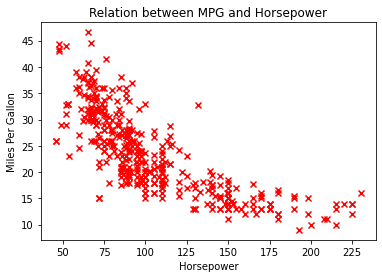

In [9]:
plt.scatter(x=auto.horsepower,y=auto.mpg,marker='x',c='r')
plt.title('Relation between MPG and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

In [10]:
auto.mpg.corr(auto.horsepower)

-0.7784267838977756

- The correlation between the mpg and horsepower is strong.

#### ***iii.Is the relationship between the predictor and response positive or negative?***

- The relationship between the predictor and the response is strongly negative.

####***iv.What is the predicted mpg associated with horsepower of 98? What are the associated 95% confidance and prediction intervals?***

In [0]:
horsepower_ = pd.DataFrame(data=np.array([98]),columns=['horsepower'])

In [0]:
summary_details = lm.get_prediction(horsepower_)

In [13]:
print(f'Predicted Miles Per Gallon for Horsepower 98 is {summary_details.predicted_mean}')
print(f'Confidance Interval{summary_details.conf_int()}')
print(f'Prediction Interval{summary_details.var_pred_mean}')

Predicted Miles Per Gallon for Horsepower 98 is [24.46707715]
Confidance Interval[[23.97307896 24.96107534]]
Prediction Interval[0.06313277]


### (B) Plot the response and the predictor. Display the least squares regression line.

In [0]:
pred_mpg = lm.predict(auto.horsepower)

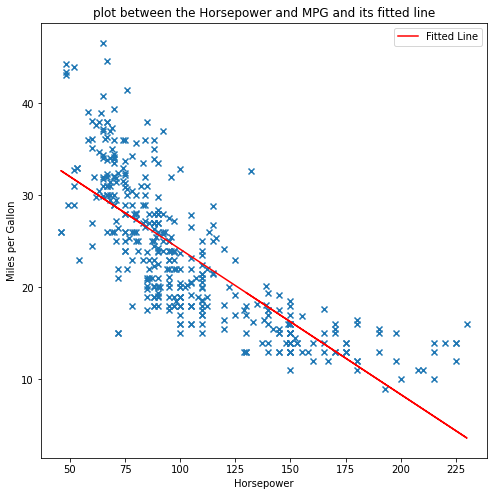

In [15]:
plt.figure(figsize=(8,8))
plt.title('plot between the Horsepower and MPG and its fitted line')
plt.scatter(x=auto.horsepower,y=auto.mpg,marker='x')
plt.plot(auto.horsepower,pred_mpg,c='r',label='Fitted Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.legend(loc='best')
plt.show()

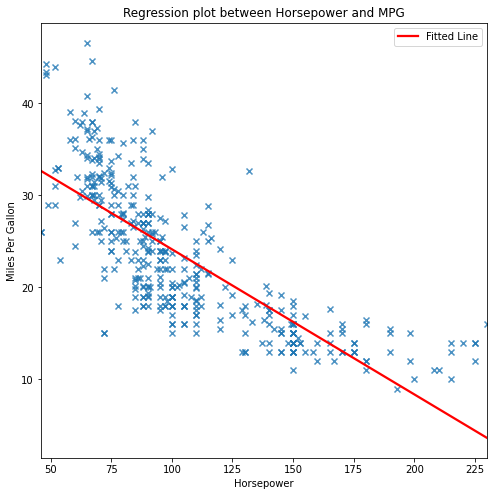

In [16]:
plt.figure(figsize=(8,8))
sns.regplot(x=auto.horsepower,y=auto.mpg,lowess=False,ci=None,marker='x',line_kws={'color':'r','label':'Fitted Line'},order=1)
plt.title('Regression plot between Horsepower and MPG')
plt.xlabel('Horsepower')
plt.legend(loc='best')
plt.ylabel('Miles Per Gallon')
plt.show()

### (C) Produce Diagnostic plots of the least square regression fit.Comment on any problems you see with the fit.

***Checking the Non Linearity of the data and the consistance of the Residuals***

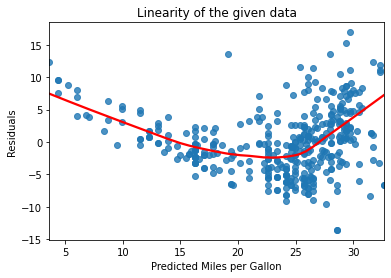

In [17]:
plt.title('Linearity of the given data')
sns.regplot(x=pred_mpg,y=lm.resid,lowess=True,ci=None,line_kws={'color':'r'})
plt.xlabel('Predicted Miles per Gallon')
plt.ylabel('Residuals')
plt.show()

***Correlation between the predictor and response***

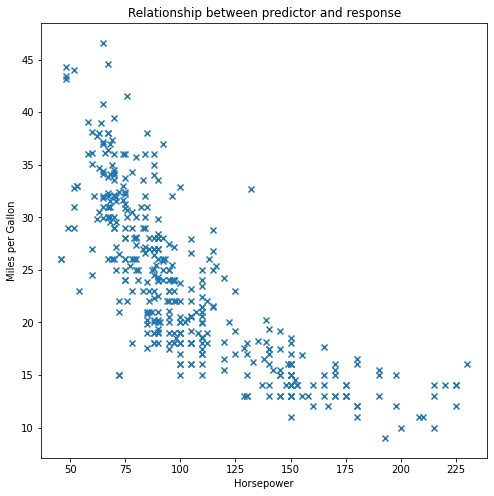

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(x=auto.horsepower,y=auto.mpg,marker='x')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.title('Relationship between predictor and response')
plt.show()

In [19]:
auto.mpg.corr(auto.horsepower)

-0.7784267838977756

***Probability Plots***

In [0]:
import scipy.stats as stats

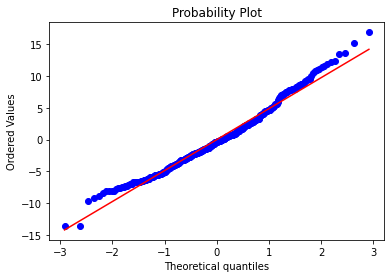

In [21]:
stats.probplot(lm.resid,plot=plt)
plt.show()

**Observation**
- Linearity of Data
  - We can observe a pattern in the Linearity plot.
  - For a data to be properly linear, we would need a better model because the residuals show non-linearity in data.
  - A better fitted regression line is needed.
- Variance of Residuals
  - It shows a funnel like pattern.
  - Inconsistance Variance in Residals.
- We can achieve better results at the end and the beginning of the model.

**Solutions:**
- Linearity
  - If the problem persists, we can try a polynomial regression for the same data.
- Inconstant Variance in Errors
  - This can be solved by taking a log or square root of the response variable.

## 2.This Question involves multiples linear regression on Auto data set.

### (A) Produce a scatter plot matrix of all the variables in the data set.

<Figure size 1440x720 with 0 Axes>

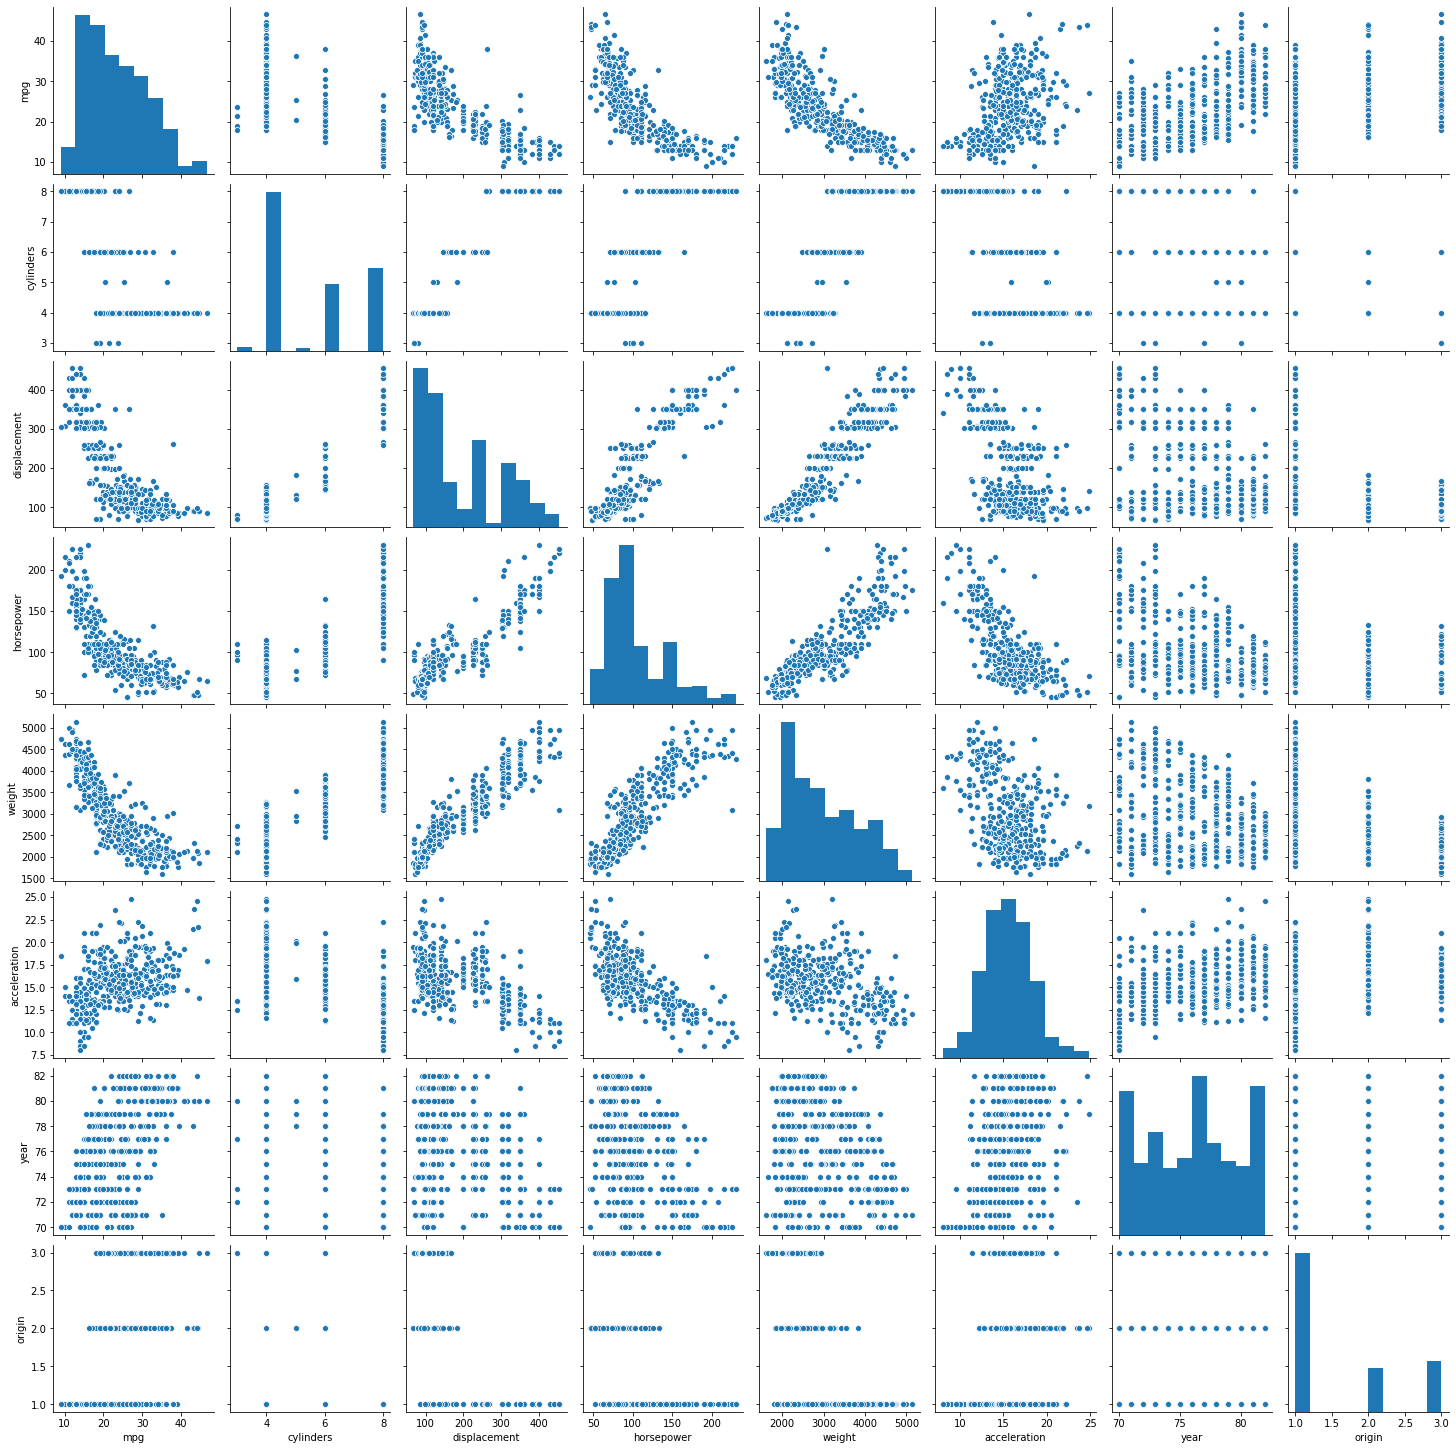

In [22]:
plt.figure(figsize=(20,10))
sns.pairplot(auto)
plt.show()

### (B) Compute the matrix of correaltion between the variables and exclude the qualitative variables

In [23]:
print('Correlation Matrix')
auto.drop('name',1).corr()

Correlation Matrix


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (C) Perform a multiple linear regression with mpg as response and all other variables except name as predictors. Use summary() to print the results.Comment on the output.

In [24]:
lr = smf.ols('mpg ~ '+'+'.join(auto.columns.difference(['mpg','name'])),data=auto).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 26 Apr 2020   Prob (F-statistic):          2.04e-139
Time:                        09:33:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

**Observation:**
- The model is significant.
- The predictors acceleration,cylinders,horsepower are non significant according to the model.
- The model is normally distributed.
- The Durbin-Watson value is 1.3 which is pretty close to 2, which means there is collinearity, but not in huge values.

#### i.Is there a relationship between the predictors and the response varaible?

In [25]:
print('Correlation Matrix')
auto.drop('name',1).corr()

Correlation Matrix


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**Observation:**
- The Cylinder and the Displacement have a strong correlation between the predictors themselves.
- horsepower,cylinder,displacement and weight are strongly related to the response negatively.
- acceleration,year and orgin are positively related to the response.

#### ii.Which predictors appear to have a statistical significance relationship to the response?


- Displacement, Origin, Weight and Year are statistically significant to the response in this model.

#### iii.What does the coeffiecient of the variable year suggest?

- The coeffiencient of the year is 0.7508
- This suggest that the year value increase by 1 unit increase the response by 0.7508 when all other predictors are kept constant.

### (D) Produce Diagnostic plots for the linear regression fit. Comment on any problems, that you observe with the fits.

***Linearity and Variance of Residuals***

In [0]:
pred_mpg_all = lr.predict(auto.drop(['name','mpg'],1))

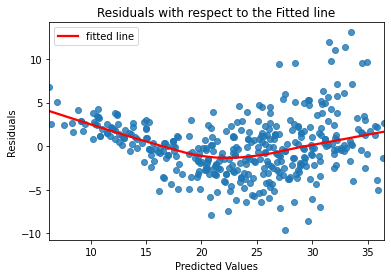

In [27]:
plt.title('Residuals with respect to the Fitted line')
sns.regplot(x=pred_mpg_all,y=lr.resid,line_kws={'color':'r','label':'fitted line'},lowess=True,ci=None)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.show()

- The model that we used here doesnt fit the data properly.
- There is a huge variance in residuals, this indicates the presence of huge outlier at the end of the data.

**Normality of the residuals**

In [0]:
import scipy.stats as stats

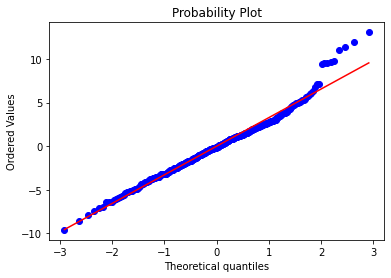

In [29]:
stats.probplot(lr.resid,plot=plt)
plt.show()

- This plot shows that the distribution of the data is not normal.

**Leverage plots:**

In [0]:
# Leverage points
model_leverage = lr.get_influence().hat_matrix_diag
# Cooks distance
model_cooks = lr.get_influence().cooks_distance[0]

In [0]:
st_res = lr.resid.std()
standardized_residual = lr.resid/st_res

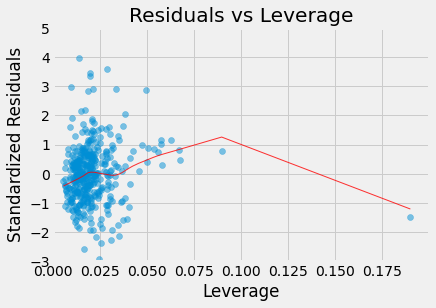

In [32]:
style.use('fivethirtyeight')
plt.scatter(model_leverage, standardized_residual, alpha=0.5);
sns.regplot(model_leverage, standardized_residual,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plt.xlim(0, max(model_leverage)+0.01)
plt.ylim(-3, 5)
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals');


**Standardized Residual:** It is the residual divided by its standard deviation

  $\text{Standardized Residual}_i = \frac{\text{Residual}_i}{\text{Standard Deviation of Residual}_i}$

**Scale-Location plot:**

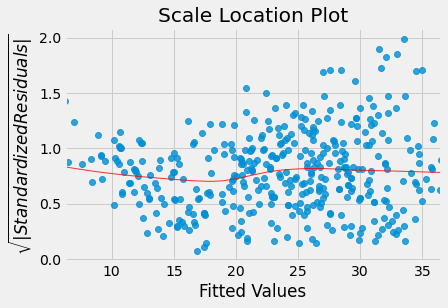

In [33]:
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residual))
sns.regplot(x=pred_mpg_all,y=sqrt_standardized_residuals,lowess=True,scatter=True,line_kws={'color':'r','alpha':0.8,'lw':1})
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$')
plt.title('Scale Location Plot')
plt.show()